# <font color='blue'>KNN Hands-On</font>
# <font color='blue'>Capítulo 3</font>


In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook:', python_version())

Versão da Linguagem Python usada neste Jupyter Notebook: 3.9.12


In [2]:
import sklearn
print(sklearn.__version__)

1.4.2


## Estrutura de Células de Voronoi

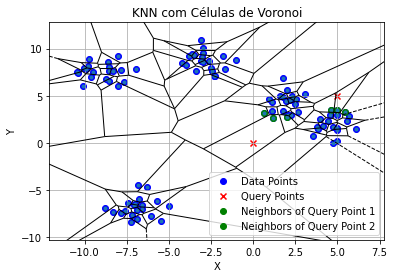

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

# Gerar dados de exemplo
X, _ = make_blobs(n_samples=100, centers=5, random_state=42)

# Construir a estrutura de células de Voronoi
vor = Voronoi(X)

# Plotar as células de Voronoi
voronoi_plot_2d(vor, show_vertices=False)

# Criar um modelo KNN com k=3
knn = NearestNeighbors(n_neighbors=3, algorithm='brute')

# Ajustar o modelo aos dados
knn.fit(X)

# Pontos de consulta
query_points = np.array([[0, 0], [5, 5]])

# Encontrar os vizinhos mais próximos para os pontos de consulta
distances, indices = knn.kneighbors(query_points)

# Plotar os pontos de dados e os pontos de consulta
plt.scatter(X[:, 0], X[:, 1], c='b', label='Data Points')
plt.scatter(query_points[:, 0], query_points[:, 1], c='r', marker='x', label='Query Points')

# Plotar os vizinhos mais próximos para os pontos de consulta
for i, q in enumerate(query_points):
    neighbors = X[indices[i]]
    plt.scatter(neighbors[:, 0], neighbors[:, 1], c='g', marker='o', label=f'Neighbors of Query Point {i+1}')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN com Células de Voronoi')
plt.grid(True)
plt.show()


## Fim